In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_path = '/content/drive/MyDrive/dog_vs_cat'

Found 192 images belonging to 2 classes.


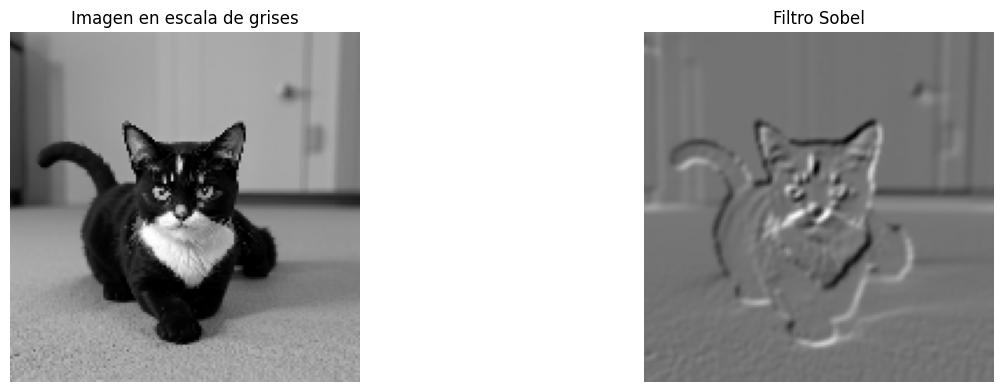

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

def apply_filters_and_convolutions(image):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    # Aplicar un filtro de detección de bordes (Sobel)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)


    return gray_image, sobel_combined

def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

images, _ = next(train_generator)

# Aplicar filtros y convoluciones a la primera imagen del batch
gray_image, sobel_combined = apply_filters_and_convolutions(images[0])

# Mostrar las imágenes resultantes
display_images([gray_image, sobel_combined],
               ['Imagen en escala de grises', 'Filtro Sobel'])

In [29]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(150, 150, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # clasificación binaria
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [30]:
# Crear el modelo
model = create_cnn_model()

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.3936 - loss: 2.3295
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.4992 - loss: 0.6908
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.7339 - loss: 0.6646
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 445ms/step - accuracy: 0.6734 - loss: 0.5988
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 0.7961 - loss: 0.4921
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.8949 - loss: 0.3562
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.8773 - loss: 0.3091
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.8936 - loss: 0.2423
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 509ms/step - accuracy: 0.9653 - loss: 0.1258
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step - accuracy: 0.9655 - loss: 0.1021


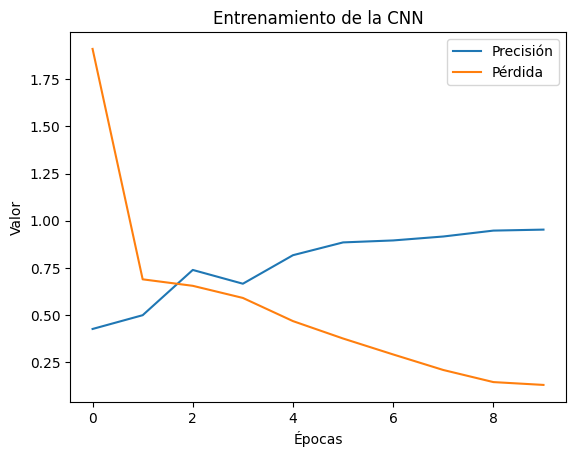

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['loss'], label='Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Entrenamiento de la CNN')
plt.legend()
plt.show()

In [34]:
# Obtener un batch de imágenes
images, labels = next(train_generator)

# Hacer predicciones
predictions = model.predict(images)

# Convertir las predicciones a clases (0 o 1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()
true_classes = labels.astype("int32").flatten()

# Obtener nombres de las clases desde el generador
class_names = list(train_generator.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


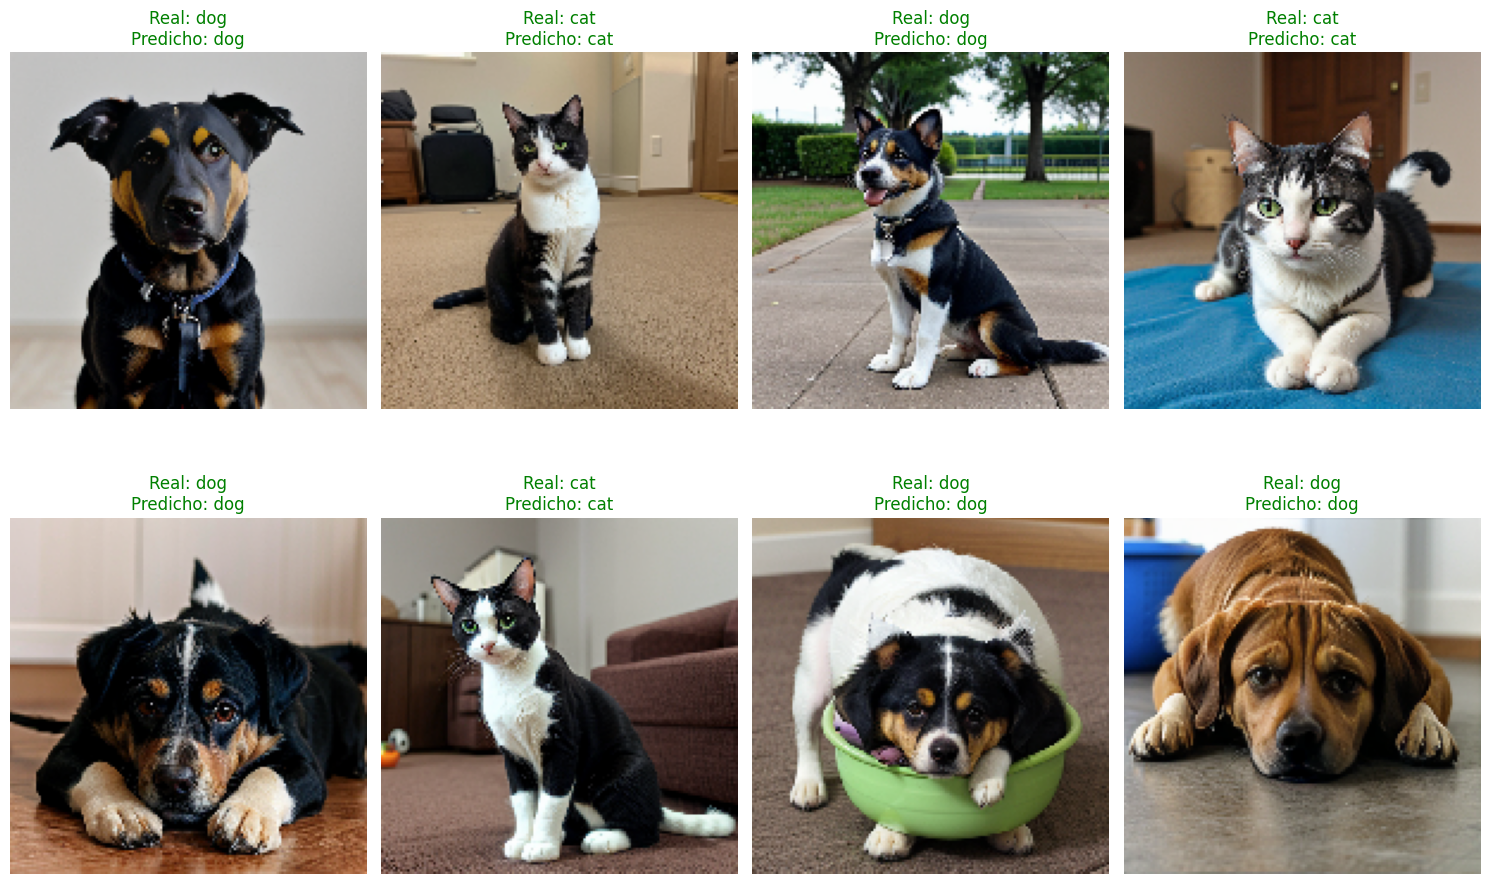

In [36]:
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    true_label = class_names[true_classes[i]]
    predicted_label = class_names[predicted_classes[i]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"Real: {true_label}\nPredicho: {predicted_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()